# Scientific Python Final Project:
# Performance Analysis of Basketball Players

#### Yiğit Tahmisoğlu - MA in Economics

## I. Introduction

The National Basketball Association (NBA, a professional basketball league in North America.  is considered to be the most elite basketball league in the world. Players that play there are considered the finest and most talented athletes of the sport. 

Euroleague is a European professional basketball club competition. It is widely recognised as the top-tier league in Europe and brings together the finest teams from major European leagues to compete against each other.

Usually, the players that outperform others in Euroleague tend to transfer to NBA later in their career to play amongst the most elite. In my analysis, I try to uncover whether Turkish player that transfer to NBA perform better than they do in the Euroleague. I measure performance based on some player efficiency measures that I define later in the Analysis section. I chose to compare based on NBA Regular Season performance versus the Euroleague performance (and not the local Turkish league) due to the closeness of competitivness level of Euroleague to NBA Regular Season.


Additionally, I try to show if the BMI (Body Mass Index) of the player have any correlation with their performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
#import plotly.graph_objs as go
#import plotly.express as px

In [4]:
df = pd.read_stata('TRIR62FL.dta', convert_categoricals=False, convert_missing=True)  

In [6]:
print(df)

               caseid v000  v001  v002  v003  v004     v005  v006  v007  v008  \
0           010101 02  TR6   101     1     2   101  2689194    11  2013  1367   
1           010102 02  TR6   101     2     2   101  2689194    11  2013  1367   
2           010103 02  TR6   101     3     2   101  2689194    11  2013  1367   
3           010103 04  TR6   101     3     4   101  3253717    11  2013  1367   
4           010104 02  TR6   101     4     2   101  2689194    11  2013  1367   
...               ...  ...   ...   ...   ...   ...      ...   ...   ...   ...   
9741        362214 02  TR6  3622    14     2  3622   414413    10  2013  1366   
9742        362215 02  TR6  3622    15     2  3622   414413    10  2013  1366   
9743        362215 03  TR6  3622    15     3  3622   464879    10  2013  1366   
9744        362216 02  TR6  3622    16     2  3622   414413    10  2013  1366   
9745        362218 08  TR6  3622    18     8  3622   414413    10  2013  1366   

      ...  s731c_7  s731c_8

In [2]:
cd C:\Users\YIGIT\Desktop\SCIENTIFIC PYTHON\Project

C:\Users\YIGIT\Desktop\SCIENTIFIC PYTHON\Project


## II. Data

For my project, I use dataset of per season basketball players statistics of 49 basketball leagues for the seasons 1999-2020.
There are in total 14582 players and their statistics. Player details include the player's name, birth date, height, weight, nationality, teams played, and statistics (e.g. PTS, AST, BLK) per season.

In [3]:
pd.set_option('display.max_columns',50)
df = pd.read_csv("./players_stats_by_season_full_details.csv")

In [4]:
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",07-Jan,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",06-Jun,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",06-Sep,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",06-Apr,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [5]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')

#### Some more information about the variables: 
    - GP : Games Played
    - MIN: Minutes Played
    - FGM: Field Goals Made
    - FGA: Field Goal Attempts
    - 3PM: 3-Points Made
    - 3PA: 3-Points Attempts
    - FTM: Free Throws Made
    - FTA: Free Throws Attempted
    - TOV: Turnovers
    - PF : Personal Fouls
    - ORB: Offensive Rebounds
    - DRB: Defensive Rebounds
    - REB: Total Rebounds
    - AST: Total Assists
    - STL: Total Steals
    - BLK: Total Blocks
    - PTS: Total Points

### Descriptive Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,53949.0,30.313574,17.849616,1.0,17.0,29.0,37.0,85.0
MIN,53949.0,752.431404,534.216679,0.0,380.9,663.0,954.0,3485.0
FGM,53949.0,113.200541,100.164033,0.0,48.0,89.0,145.0,978.0
FGA,53949.0,245.094942,212.155076,0.0,109.0,196.0,310.0,2173.0
3PM,53949.0,28.468535,30.673395,0.0,6.0,20.0,41.0,402.0
3PA,53949.0,80.738383,80.672208,0.0,20.0,61.0,117.0,1028.0
FTM,53949.0,56.297299,59.240650,0.0,20.0,40.0,73.0,756.0
FTA,53949.0,76.012716,76.172698,0.0,28.0,56.0,99.0,972.0
TOV,53949.0,47.260487,37.398461,0.0,21.0,39.0,63.0,464.0
PF,53949.0,70.101040,45.629770,0.0,37.0,64.0,91.0,371.0


Deleting the observations for NBA Playoffs from the dataset:

In [7]:
df = df[df.Stage != 'Playoffs']

Introducing the player performance matrices:

In [8]:
# Offensive Efficiency
df['PTSperGame'] = round(df['PTS']/df['GP'])
df['FGAperGame'] = round(df['FGA']/df['GP'])
df['FGMperGame'] = round(df['FGM']/df['GP'])
df['ASTperGame']=round(df['AST']/df['GP'])
df['%3Pts'] = round((df['3PM']/df['3PA'])*100)
df['%FG'] = round((df['FGMperGame']/df['FGAperGame'])*100)

# Defensive Efficiency
df['BLKperGame']=round(df['BLK']/df['GP'])
df['STLperGame']=round(df['STL']/df['GP'])
df['REBperGame']=round(df['REB']/df['GP'])

df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,PTSperGame,FGAperGame,FGMperGame,ASTperGame,%3Pts,%FG,BLKperGame,STLperGame,REBperGame
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",07-Jan,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic,30.0,21.0,12.0,4.0,0.0,57.0,3.0,0.0,14.0
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",06-Jun,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors,26.0,21.0,10.0,4.0,40.0,48.0,1.0,1.0,6.0
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",06-Sep,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz,26.0,18.0,9.0,4.0,25.0,50.0,1.0,1.0,10.0
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers,28.0,25.0,10.0,5.0,34.0,40.0,0.0,2.0,4.0
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",06-Apr,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics,24.0,20.0,9.0,9.0,34.0,45.0,0.0,2.0,6.0


I am interested in analysing players and teams from NBA and Euroleague. I define variables that return the teams of both leagues.

In [9]:
euroleague = df[df['League'] == 'Euroleague']
NBA = df[df['League'] =='NBA']

Players that have a Turkish nationality:

In [10]:
turkish = df[df['nationality'] == 'Turkey']
# That played NBA
turk_nba = NBA[df['nationality'] == 'Turkey']
# That played in Euroleague
turk_eu = euroleague[df['nationality'] == 'Turkey']

##### The full list of players with Turkish nationality:

In [11]:
print('The Turkish players that played in the Euroleague are: \n',turk_eu.Player.unique())

The Turkish players that played in the Euroleague are: 
 ['Ibrahim Kutluay' 'Mehmet Okur' 'Hakki Harun Erdenay' 'Mirsad Turkcan'
 'Omer Onan' 'Asim Pars' 'Haluk Yildirim' 'Tutku Acik' 'Kerem Gonlum'
 'Kerem Tunceri' 'Serkan Erdogan' 'Kaya Peker' 'Alper Yilmaz' 'Ermal Kuqo'
 'Ender Arslan' 'Huseyin Besok' 'Cuneyt Erden' 'Mustafa Abi'
 'Ersan Ilyasova' 'Oguz Savas' 'Emir Preldzic' 'Semih Erden' 'Sinan Guler'
 'Furkan Aldemir' 'Cenk Akyol' 'Cevher Ozer' 'Serhat Cetin'
 'Ilkan Karaman' 'Muratcan Guler' 'Baris Ermis' 'Can Akin'
 'Melih Mahmutoglu' 'Birkan Batuk' 'Dogus Balbay' 'Cedi Osman'
 'Ali Muhammed' 'Scottie Wilbekin' 'Kenan Sipahi' 'Can Altintig'
 'Shane Larkin' 'Goksenin Koksal' 'Kartal Ozmizrak' 'Ahmet Duverioglu'
 'Sertac Sanli']


In [12]:
print('The Turkish players that played in the NBA: \n',turk_nba.Player.unique())

The Turkish players that played in the NBA: 
 ['Hedo Turkoglu' 'Mehmet Okur' 'Ersan Ilyasova' 'Omer Asik' 'Enes Kanter'
 'Shane Larkin' 'Cedi Osman' 'Furkan Korkmaz']


##### Lets identify the list of players that played both in NBA and Euroleague:

In [13]:
turk_eu1 = turk_eu['Player'].tolist()
turk_nba1 = turk_nba['Player'].tolist()
turk_eu_set =set(turk_eu1)
turk_nba_set = set(turk_nba1)
common_players = turk_nba_set.intersection(turk_eu_set)
print('Players that played both in the NBA and EuroLeague between 1999-2020:')
for player in common_players:
  print(player)

Players that played both in the NBA and EuroLeague between 1999-2020:
Shane Larkin
Mehmet Okur
Cedi Osman
Ersan Ilyasova


In [14]:
# Add them to a list:
common_players = ["Cedi Osman", "Ersan Ilyasova", "Mehmet Okur", "Shane Larkin"]

In [15]:
sumpoints_eu = turk_eu.groupby('Player')['PTS'].sum()
sumpoints_eu = sumpoints_eu.sort_values(ascending=False)
highest_scorers_eu = sumpoints_eu[:10]
print('The top 10 highest Turkish scorers in the Euroleague between 1999-2020 are: \n', highest_scorers_eu)

The top 10 highest Turkish scorers in the Euroleague between 1999-2020 are: 
 Player
Shane Larkin        1425
Scottie Wilbekin    1355
Kerem Gonlum        1314
Ibrahim Kutluay     1234
Mirsad Turkcan      1224
Emir Preldzic       1178
Kaya Peker          1124
Ali Muhammed        1124
Serkan Erdogan       987
Ender Arslan         949
Name: PTS, dtype: int64


In [16]:
sumpoints_nba = turk_nba.groupby('Player')['PTS'].sum().sort_values(ascending=False)
highest_scorers_nba = sumpoints_nba[:10]
print('The top 10 highest Turkish scorers in the NBA between 1999-2020 are: \n', highest_scorers_nba)

The top 10 highest Turkish scorers in the NBA between 1999-2020 are: 
 Player
Hedo Turkoglu     9938
Mehmet Okur       8367
Enes Kanter       7415
Ersan Ilyasova    6039
Cedi Osman        1947
Omer Asik         1823
Shane Larkin      1267
Furkan Korkmaz     704
Name: PTS, dtype: int64


##### Number of games played:

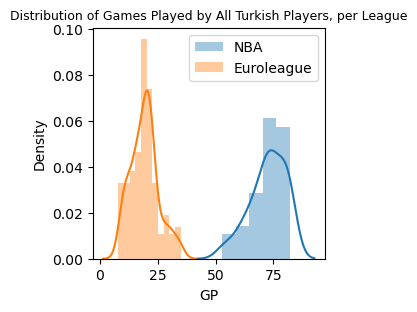

In [17]:
plt.figure(figsize=(3, 3))
sns.distplot(turk_nba['GP'], label='NBA')
sns.distplot(turk_eu['GP'], label='Euroleague')
plt.title("Distribution of Games Played by All Turkish Players, per League", fontsize=9)
plt.legend()

There are more games in a regular NBA season then there is in the Euroleague.

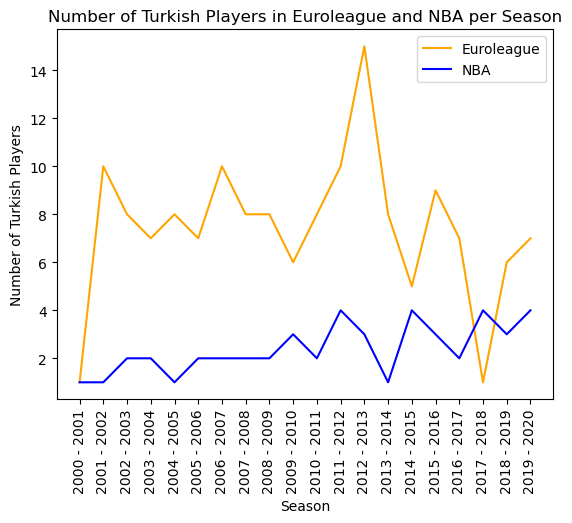

In [18]:
counts = turk_eu.groupby('Season')['Player'].count()
plt.plot(counts.index, counts.values, color='orange', label='Euroleague')
plt.xlabel('Season')
plt.ylabel('Number of Players')
plt.title('Number of Turkish Players in Euroleague and NBA per Season')
xtick_labels = sorted(counts.index.tolist())
plt.xticks(xtick_labels, rotation=90)

counts = turk_nba.groupby('Season')['Player'].count()
plt.plot(counts.index, counts.values, color='b', label='NBA')
plt.xlabel('Season')
plt.ylabel('Number of Turkish Players')
xtick_labels = sorted(counts.index.tolist())
plt.xticks(xtick_labels, rotation=90)
plt.legend()
plt.show()

Number of Turkish Players that play on Euroleague seems to have decreased after 2012-2013, and in NBA it is stable in the last decade.

##### Heights Distribution:

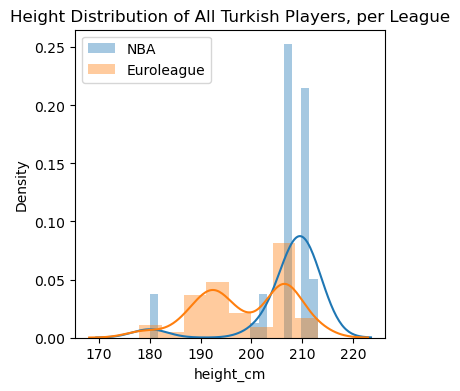

In [19]:
plt.figure(figsize=(4, 4))
sns.distplot(turk_nba['height_cm'], label='NBA')
sns.distplot(turk_eu['height_cm'], label='Euroleague')
plt.title("Height Distribution of All Turkish Players, per League")
plt.legend()

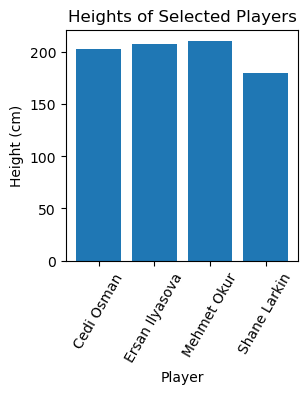

In [20]:
height_cm = []
for player in common_players:
    height = df[df["Player"] == player]["height_cm"].values[0]
    height_cm.append(height)
    
plt.figure(figsize=(3, 3))
plt.bar(common_players, height_cm)
plt.xticks(rotation=60)
plt.xlabel("Player")
plt.ylabel("Height (cm)")
plt.title("Heights of Selected Players")

plt.show()


Now lets find the top Turkish scorers in both leagues.
First in NBA:

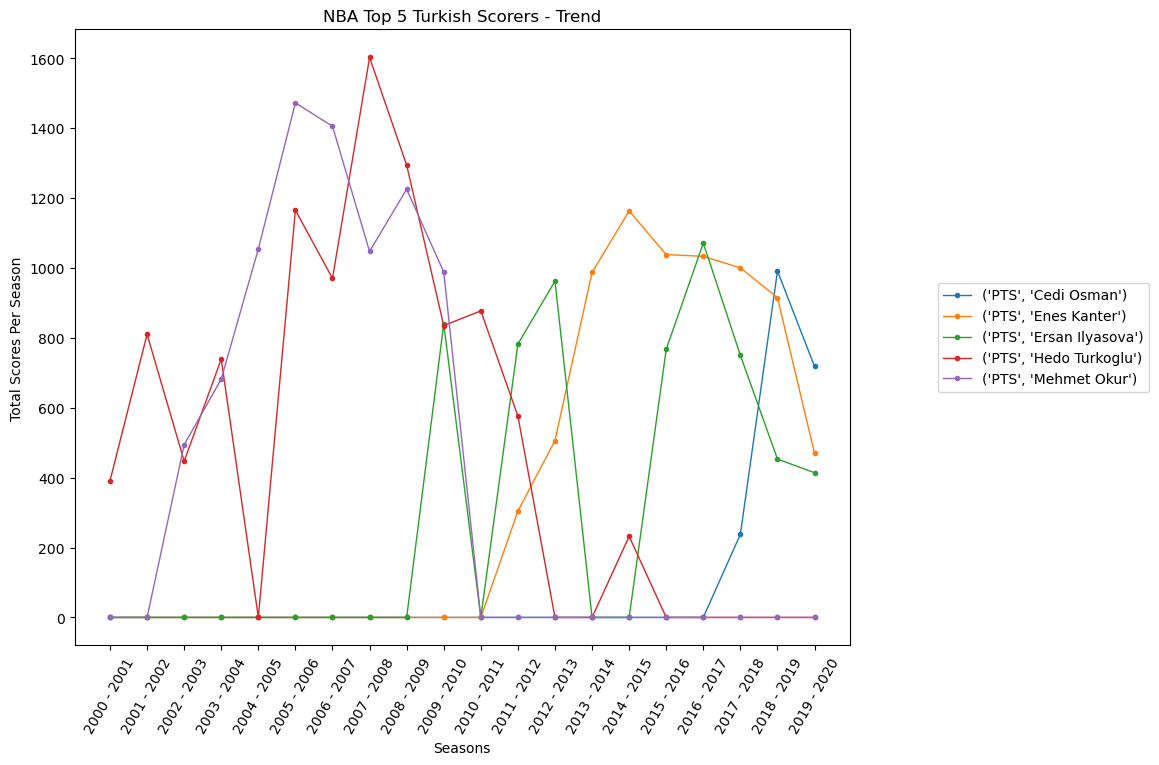

In [21]:
top_turknba = turk_nba.groupby('Player')['PTS'].sum().sort_values(ascending=False).head(5)
filtered_df = turk_nba[turk_nba['Player'].isin(top_turknba.index)]
sorted_df = filtered_df.sort_values(by=['Player', 'Season'], ascending=[True, True]).reset_index(drop=True)
topturknba = sorted_df[['Season', 'Player', 'PTS']].set_index(['Season', 'Player']).unstack().T
topturknba = topturknba.fillna(0)

fig, ax = plt.subplots(figsize=(10,8))
for i in range(topturknba.shape[0]):
    ax.plot(topturknba.columns, topturknba.iloc[i].values, label=topturknba.index[i], marker='.', lw=1)

ax.set_xticklabels(topturknba.columns, rotation=60)
ax.set_xlabel('Seasons')
ax.set_ylabel('Total Scores Per Season')
ax.set_title('NBA Top 5 Turkish Scorers - Trend')
ax.legend(loc='center', bbox_to_anchor=(1, 0.5, 0.5, 0))
plt.show()


Now the Euroleague:

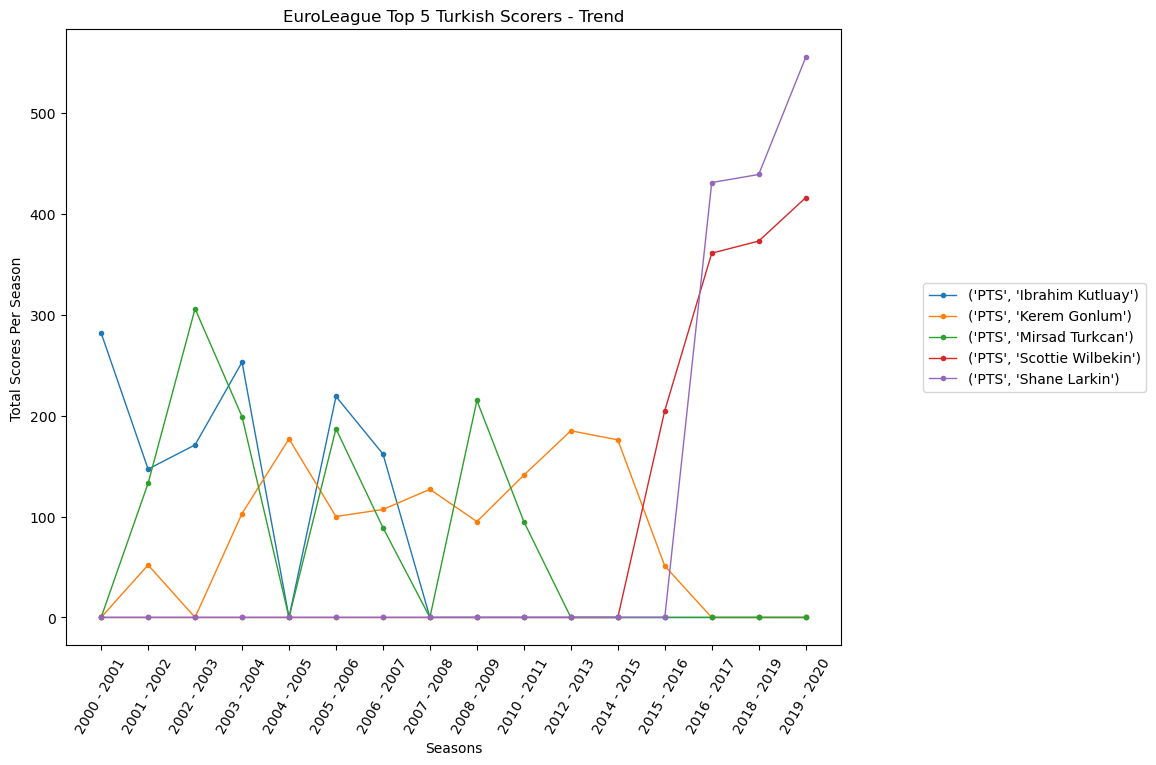

In [22]:
top_turkeu = turk_eu.groupby('Player')['PTS'].sum().sort_values(ascending=False).head(5)
filtered_df = turk_eu[turk_eu['Player'].isin(top_turkeu.index)]
sorted_df = filtered_df.sort_values(by=['Player', 'Season'], ascending=[True, True]).reset_index(drop=True)
topturkeu = sorted_df[['Season', 'Player', 'PTS']].set_index(['Season', 'Player']).unstack().T
topturkeu = topturkeu.fillna(0)

fig, ax = plt.subplots(figsize=(10,8))
for i in range(topturkeu.shape[0]):
    ax.plot(topturkeu.columns, topturkeu.iloc[i].values, label=topturkeu.index[i], marker='.', lw=1)

ax.set_xticklabels(topturkeu.columns, rotation=60)
ax.set_xlabel('Seasons')
ax.set_ylabel('Total Scores Per Season')
ax.set_title('EuroLeague Top 5 Turkish Scorers - Trend')
ax.legend(loc='center', bbox_to_anchor=(1, 0.5, 0.5, 0))
plt.show()


In the recent years, the highest Turkish scorers in Euroleague appears to be the players that have been naturalized citizens, players that were given Turkish citizenship and play for Turkish national team.

## III. Analysis

Now we use the efficiency parameters we have calculated earlier and compare the per league performance of players that played both in Euroleague and NBA. 

##### Efficiency analysis for players that played both in NBA and Euroleague, per league:

##### Offensive Efficiency

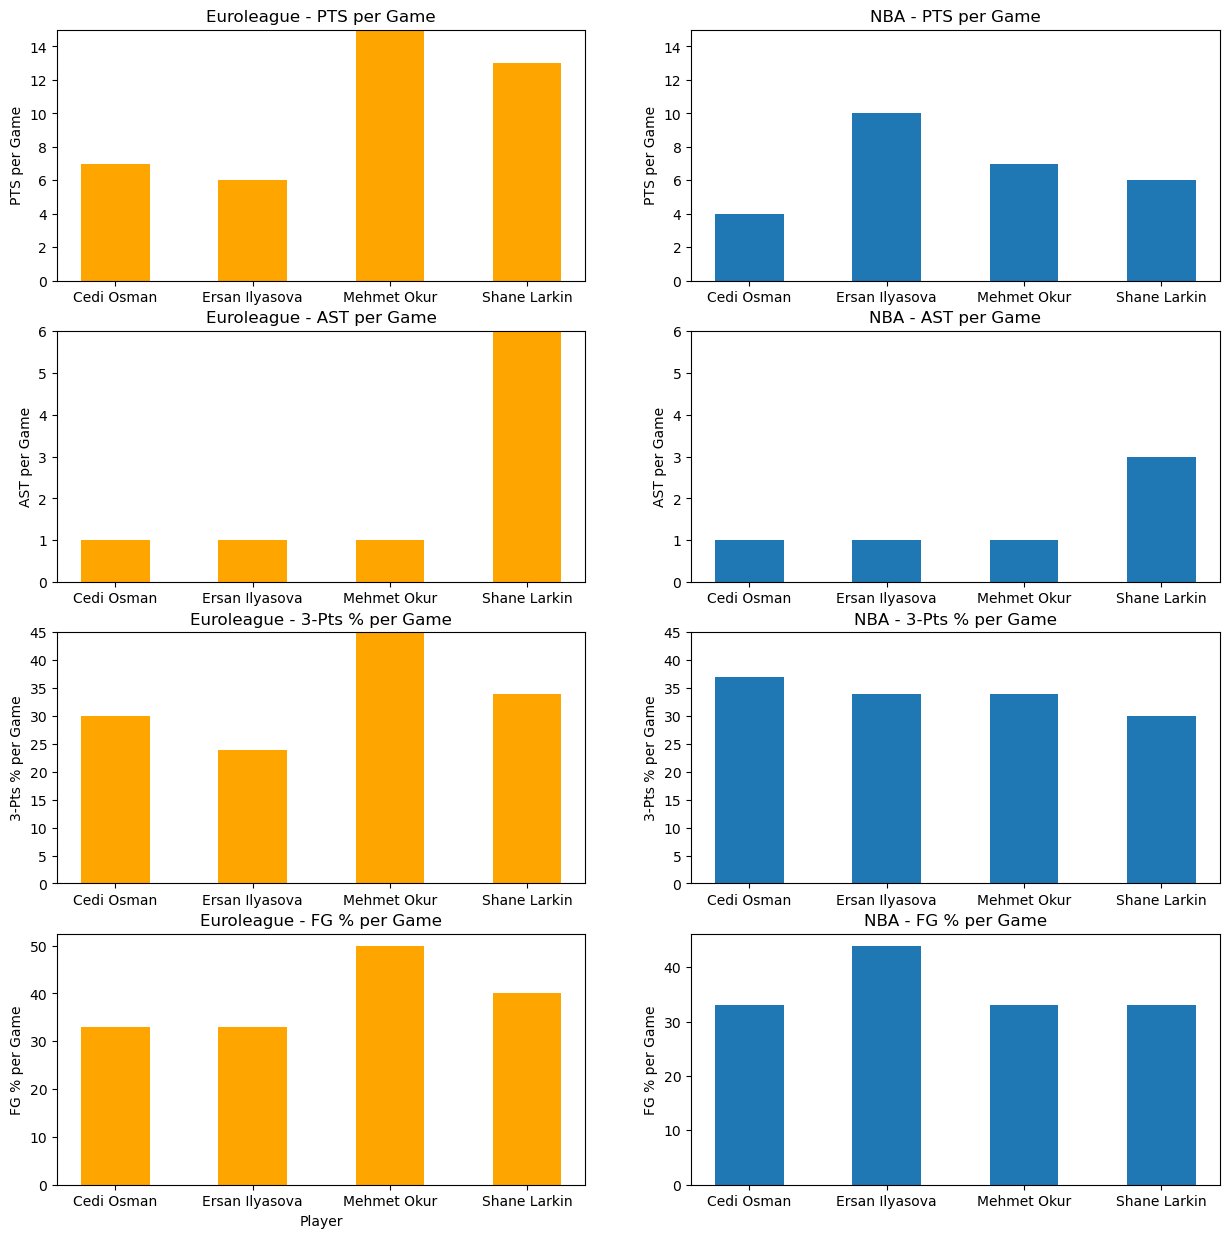

In [23]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

#Euroleague
PTSperGame = []
for player in common_players:
    pts = turk_eu[turk_eu["Player"] == player]["PTSperGame"].values[0]
    PTSperGame.append(pts)
ax[0][0].bar(common_players, PTSperGame, width=0.5, color='orange')
ax[0][0].set_xticklabels(common_players)
ax[0][0].set_ylabel("PTS per Game")
ax[0][0].set_title("Euroleague - PTS per Game")
ax[0][0].set_ylim(0, 15)

#NBA
PTSperGame = []
for player in common_players:
    pts = turk_nba[turk_nba["Player"] == player]["PTSperGame"].values[0]
    PTSperGame.append(pts)
ax[0][1].bar(common_players, PTSperGame, width=0.5)
ax[0][1].set_xticklabels(common_players)
ax[0][1].set_ylabel("PTS per Game")
ax[0][1].set_title("NBA - PTS per Game")
ax[0][1].set_ylim(0, 15)

#Euroleague
ASTperGame = []
for player in common_players:
    ast = turk_eu[turk_eu["Player"] == player]["ASTperGame"].values[0]
    ASTperGame.append(ast)
ax[1][0].bar(common_players, ASTperGame, width=0.5, color='orange')
ax[1][0].set_xticklabels(common_players)
ax[1][0].set_ylabel("AST per Game")
ax[1][0].set_title("Euroleague - AST per Game")
ax[1][0].set_ylim(0, 6)

#NBA
ASTperGame = []
for player in common_players:
    ast = turk_nba[turk_nba["Player"] == player]["ASTperGame"].values[0]
    ASTperGame.append(ast)
ax[1][1].bar(common_players, ASTperGame, width=0.5)
ax[1][1].set_xticklabels(common_players)
ax[1][1].set_ylabel("AST per Game")
ax[1][1].set_title("NBA - AST per Game")
ax[1][1].set_ylim(0, 6)

#Euroleague
threeperc = []
for player in common_players:
    threepts = turk_eu[turk_eu["Player"] == player]["%3Pts"].values[0]
    threeperc.append(threepts)
ax[2][0].bar(common_players, threeperc, width=0.5, color='orange')
ax[2][0].set_xticklabels(common_players)
ax[2][0].set_xlabel("")
ax[2][0].set_ylabel("3-Pts % per Game")
ax[2][0].set_title("Euroleague - 3-Pts % per Game")
ax[2][0].set_ylim(0, 45)

#NBA
threeperc = []
for player in common_players:
    threepts = turk_nba[turk_nba["Player"] == player]["%3Pts"].values[0]
    threeperc.append(threepts)
ax[2][1].bar(common_players, threeperc, width=0.5)
ax[2][1].set_xticklabels(common_players)
ax[2][1].set_xlabel("")
ax[2][1].set_ylabel("3-Pts % per Game")
ax[2][1].set_title("NBA - 3-Pts % per Game")
ax[2][1].set_ylim(0, 45)

#Euroleague
fgperc = []
for player in common_players:
    fg = turk_eu[turk_eu["Player"] == player]["%FG"].values[0]
    fgperc.append(fg)
ax[3][0].bar(common_players, fgperc, width=0.5, color='orange')
ax[3][0].set_xticklabels(common_players)
ax[3][0].set_xlabel("Player")
ax[3][0].set_ylabel("FG % per Game")
ax[3][0].set_title("Euroleague - FG % per Game")
#ax[0].set_ylim(0, 45)

#NBA
fgperc = []
for player in common_players:
    fg = turk_nba[turk_nba["Player"] == player]["%FG"].values[0]
    fgperc.append(fg)
ax[3][1].bar(common_players, fgperc, width=0.5)
ax[3][1].set_xticklabels(common_players)
ax[3][1].set_xlabel("")
ax[3][1].set_ylabel("FG % per Game")
ax[3][1].set_title("NBA - FG % per Game")
#ax[1].set_ylim(0, 45)


plt.show()


PTS per Game: Except for Ersan Ilyasova, all players have reduced in PTS per Game when they moved to NBA. And the explanation for Ersan is that he played only very shortly in Euroleague when he was a rookie, so it would be expected that his NBA performance is better in terms of scoring.

AST per Game:
Shane Larkin moved to Euroleague after playing in NBA, and he seems to have improved his performance in Euroleague. Also, his playing poition (Point Guard) makes him more likely to assists more than the other players here, which are Forwards or Center.

3-Pts%:
Except for Shane Larkin and Mehmet Okur, others increased ther 3-Pts %, which can shows us that they improved their shooting skills plus that the NBA has a more distance shooting style. 

FG%:
Ersan seems to have increased his Field Goals % performance, and there are no huge changes in others.


###### Defensive Efficiency

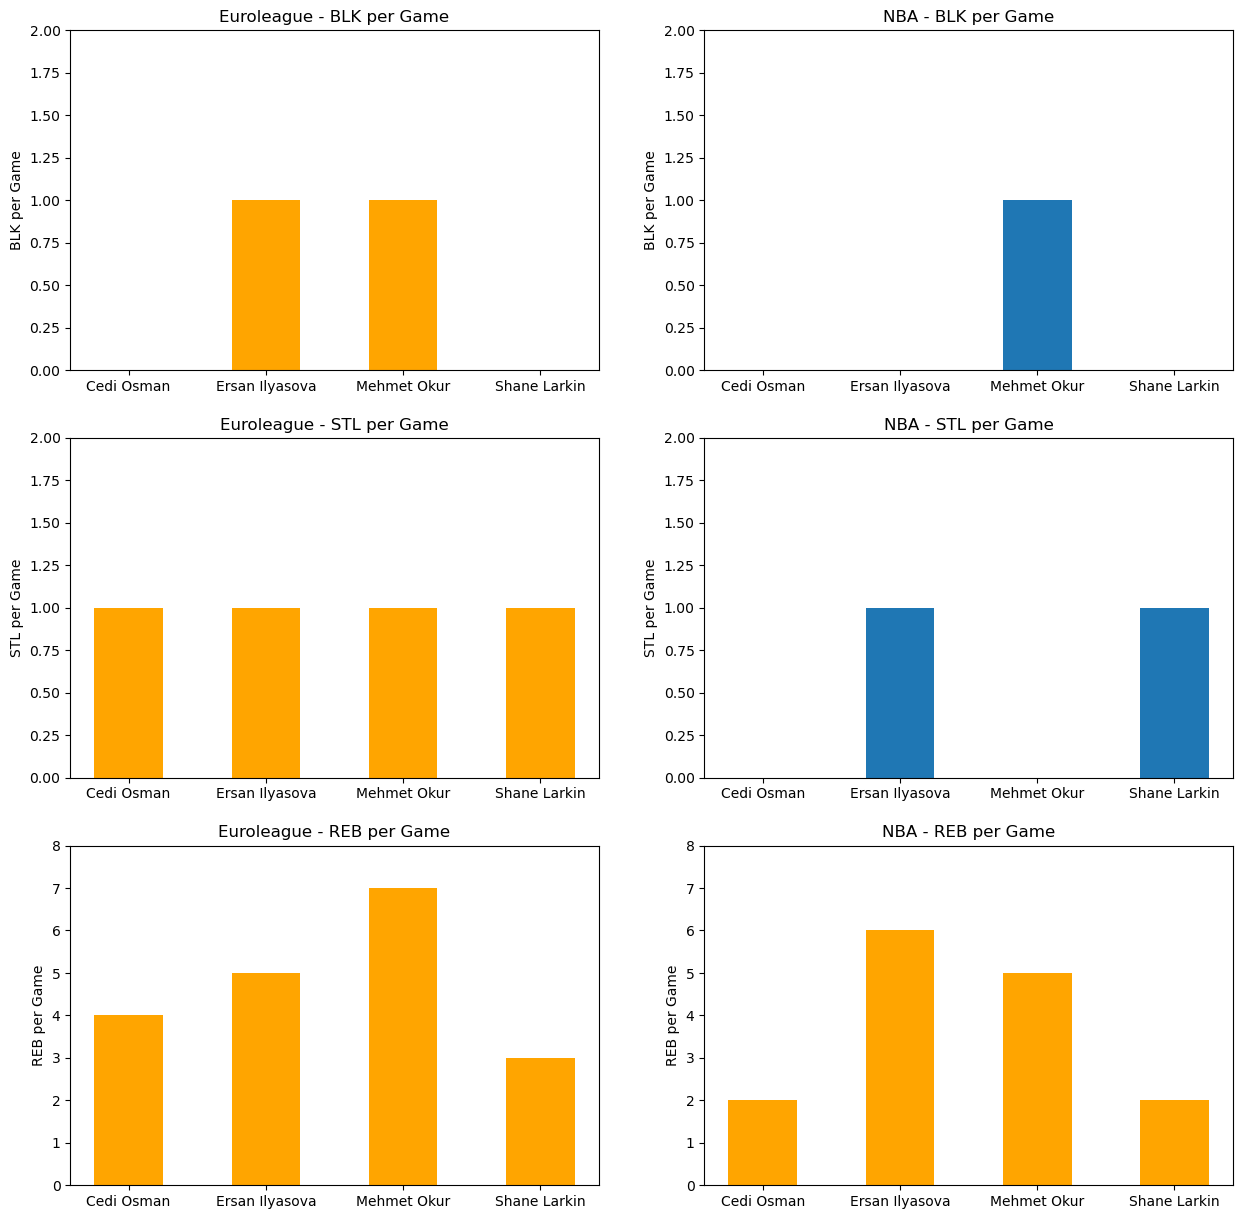

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

#Euroleague
BLKperGame = []
for player in common_players:
    blk = turk_eu[turk_eu["Player"] == player]["BLKperGame"].values[0]
    BLKperGame.append(blk)
ax[0][0].bar(common_players, BLKperGame, width=0.5, color='orange')
ax[0][0].set_xticklabels(common_players)
ax[0][0].set_ylabel("BLK per Game")
ax[0][0].set_title("Euroleague - BLK per Game")
ax[0][0].set_ylim(0, 2)

#NBA
BLKperGame = []
for player in common_players:
    blk = turk_nba[turk_nba["Player"] == player]["BLKperGame"].values[0]
    BLKperGame.append(blk)
ax[0][1].bar(common_players, BLKperGame, width=0.5)
ax[0][1].set_xticklabels(common_players)
ax[0][1].set_ylabel("BLK per Game")
ax[0][1].set_title("NBA - BLK per Game")
ax[0][1].set_ylim(0, 2)

#Euroleague
STLperGame = []
for player in common_players:
    stl = turk_eu[turk_eu["Player"] == player]["STLperGame"].values[0]
    STLperGame.append(stl)
ax[1][0].bar(common_players, STLperGame, width=0.5, color='orange')
ax[1][0].set_xticklabels(common_players)
ax[1][0].set_ylabel("STL per Game")
ax[1][0].set_title("Euroleague - STL per Game")
ax[1][0].set_ylim(0, 2)

#NBA
STLperGame = []
for player in common_players:
    stl = turk_nba[turk_nba["Player"] == player]["STLperGame"].values[0]
    STLperGame.append(stl)
ax[1][1].bar(common_players, STLperGame, width=0.5)
ax[1][1].set_xticklabels(common_players)
ax[1][1].set_ylabel("STL per Game")
ax[1][1].set_title("NBA - STL per Game")
ax[1][1].set_ylim(0, 2)

#Euroleague
rebpergame = []
for player in common_players:
    reb = turk_eu[turk_eu["Player"] == player]["REBperGame"].values[0]
    rebpergame.append(reb)
ax[2][0].bar(common_players, rebpergame, width=0.5, color='orange')
ax[2][0].set_xticklabels(common_players)
ax[2][0].set_xlabel("")
ax[2][0].set_ylabel("REB per Game")
ax[2][0].set_title("Euroleague - REB per Game")
ax[2][0].set_ylim(0, 8)

#NBA
rebpergame = []
for player in common_players:
    reb = turk_nba[turk_nba["Player"] == player]["REBperGame"].values[0]
    rebpergame.append(reb)
ax[2][1].bar(common_players, rebpergame, width=0.5, color='orange')
ax[2][1].set_xticklabels(common_players)
ax[2][1].set_xlabel("")
ax[2][1].set_ylabel("REB per Game")
ax[2][1].set_title("NBA - REB per Game")
ax[2][1].set_ylim(0, 8)

plt.show()


Blocks per Game:
Blocks are made rarely in the game, so it is not surprising that the only the tallest two of four these players have stats visible, and only Mehmet Okur(aka Memo, played center) have near 1 block per game, rest is very little.

Steals per Game:
All players average around one steal per game. Cedi and Mehmet not as much in NBA.

Rebounds per Game:
Cedi and Shane have higher rebounds per game in Euroleague, most likely due to differences in the gameplay styles of the two leagues. Ersan seems to increase his rebound performance in NBA, while Mehmet Okur have decreased. Memo's rebounds performance decrease could be explained by playing longer years in NBA and physical decay with aging later in his career.

## IV. Conclusion

The analysis gave us the performance comparison of Turkish players when they played in Euroleague versus in NBA regular season. 
The number of players are very limited (only 4 were identified), and not all of them played for many years in either league which gives us less datapoints. But the analysis remains valid, and could be used for performance comparison purposes for any player of any nationality from any league, simply by redefining some of the parameters. 